<img src="https://dauphine.psl.eu/fileadmin/_processed_/9/2/csm_damier_logo_Dauphine_f7b37a1ff2.jpg" width="200" style="vertical-align:middle" /> <h1>Master 222: Introduction to Python - Session 5</h1>





[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Zaltarba/PSL_python_for_finance/blob/main/python_session_5_corrected.ipynb)


# Introduction to yfinance

### What is yfinance?

`yfinance` stands for Yahoo Finance, and the `yfinance` library in Python allows you to access financial data from Yahoo! Finance. This can include stock prices, historical data, financial statements, and much more.

### Why use `yfinance`?

If you're interested in financial analysis, algorithmic trading, or just want to understand how the stock market behaves over time, `yfinance` is a great tool to start with. With just a few lines of Python code, you can retrieve vast amounts of financial data.

### Getting Started

Start by importing the library:
```
import yfinance as yf
```
Fetching Data:

You can fetch data for a specific stock or index. Here's how to get the historical data for Apple Inc. (AAPL) for the past month:
```
data = yf.download("AAPL", period="1mo")
print(data)
```

- Fetch the data for AAPL
- Using matplotlib.pyplot, plot the closing prices



In [1]:
## Insert your code here
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipython-input-1796214432.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period = "1mo")
[*********************100%***********************]  1 of 1 completed


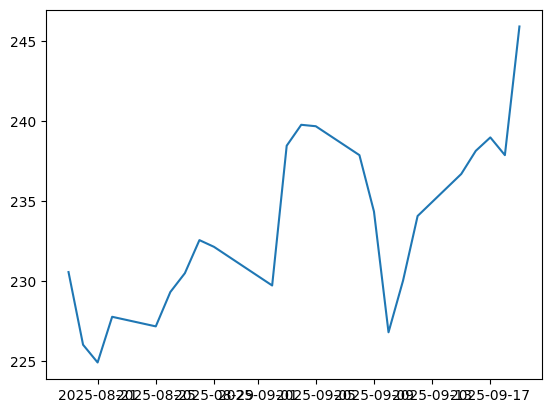

In [2]:
ticker = yf.Ticker("AAPL")  # If you have issues with yf.dowload use yf.Ticker
data = yf.download("AAPL", period = "1mo")
plt.plot(data['Close'])

**Exercise: Analyzing Historical Stock Prices**
> Context:
You are a financial analyst at an investment firm. You have been given a dataset containing historical stock prices of several companies over the past decade. Your task is to clean, analyze, and visualize the data to help the firm make informed investment decisions.

> Dataset:
The dataset contains the following columns: 'Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'.


**Data Loading and Inspection**:

- Fetch the historical stock price data for 'AAPL'.
- Display the first 10 rows of the dataset.
- Check for any missing values in the dataset.

**Data Cleaning**:

- Handle any missing values: You can either fill them using methods such as forward fill, backward fill, or interpolation, or you can choose to drop rows with missing values.
- Convert the 'Date' column to a datetime format if it isn't already..

**Data Transformation**:

- Make the 'Date' column the index of the DataFrame to facilitate time series analysis.
- Compute a new column 'Price_Average', which is the arithmetic mean of the 'High' and 'Low' prices for each trading day.

**Data Analysis**:

- Determine the specific date when the trading volume for Apple Inc. was at its peak.
- Compute the monthly average of the 'Close' price to understand monthly performance trends.

**Data Aggregation**:

- Calculate the total trading volume and average closing price for each company over the period.

**File I/O**:

- Save the cleaned and transformed dataset to a new CSV file.
- Save the plots as image files.

**Bonus**:

- Use a simple linear regression model to attempt predictions of future stock prices based on historical data. This will provide a rudimentary forecast which can be enhanced with more complex models.
- Implement a basic moving average trading strategy. For instance, consider using a 50-day and a 200-day moving average. Generate buy signals when the 50-day moving average crosses above the 200-day moving average, and sell signals when it crosses below. Backtest this strategy to gauge its historical performance.

In [3]:
# Fetch the data for AAPL
aapl = yf.download('AAPL', start='2010-01-01', end='2020-12-31')
# Display the first 10 rows
print(aapl.head(10))
# Check for missing values
print(aapl.isna().sum())

/tmp/ipython-input-1350874616.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL', start='2010-01-01', end='2020-12-31')
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.424607  6.439317  6.375674  6.407195  493729600
2010-01-05  6.435711  6.472036  6.401788  6.442316  601904800
2010-01-06  6.333345  6.461231  6.326740  6.435713  552160000
2010-01-07  6.321635  6.364264  6.275705  6.356759  477131200
2010-01-08  6.363664  6.364265  6.276006  6.313230  447610800
2010-01-11  6.307526  6.394284  6.257692  6.388280  462229600
2010-01-12  6.235778  6.297320  6.196752  6.279907  594459600
2010-01-13  6.323739  6.332144  6.127107  6.240284  605892000
2010-01-14  6.287113  6.318034  6.274805  6.307527  432894000
2010-01-15  6.182043  6.352257  6.180242  6.332143  594067600
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [4]:
aapl = aapl.ffill()
# Ensure Date is already in datetime format (as the index in this case)
print(aapl.index.dtype)

datetime64[ns]


In [5]:
aapl['Price_Average'] = (aapl['High'] + aapl['Low']) / 2

In [6]:
# Date with highest trading volume
date_max_volume = aapl['Volume'].idxmax()
print(f"Date with highest trading volume: {date_max_volume}")

# Monthly average closing price
monthly_avg_close = aapl['Close'].resample('M').mean()
print(monthly_avg_close)

Date with highest trading volume: Ticker
AAPL   2011-01-18
dtype: datetime64[ns]
Ticker            AAPL
Date                  
2010-01-31    6.235637
2010-02-28    5.967873
2010-03-31    6.706820
2010-04-30    7.539510
2010-05-31    7.548903
...                ...
2020-08-31  114.062674
2020-09-30  111.984366
2020-10-31  113.237169
2020-11-30  113.796756
2020-12-31  123.780761

[132 rows x 1 columns]


/tmp/ipython-input-4075825725.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_close = aapl['Close'].resample('M').mean()


In [7]:
total_volume = aapl['Volume'].sum().iloc[0]
avg_close_price = aapl['Close'].mean().iloc[0]
print(f"Total trading volume for the period: {total_volume}")
print(f"Average closing price for the period: {avg_close_price:.2f}")

Total trading volume for the period: 793541036600
Average closing price for the period: 31.26


**Exercice TO DO: Momentum Strategy on 50 Stocks**

## Objective
Explore the performance of a simple momentum strategy on a subset of 50 stocks.

## Procedure

### 1. Stock Selection
- Use `pandas` to fetch the list of all tickers from [this link](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
    - Use the hint
- Randomly select 50 stocks from this list.

### 2. Data Collection
- For each stock, download the daily adjusted closing prices for the last 365 days.
- Store this data in a pandas DataFrame with dates as the index.

### 3. Momentum Calculation
- Define momentum as the percentage change in the stock price over the previous n days (e.g., n=21 for a month).
- Using pandas, compute the momentum for each stock for each day.
- Rank the stocks based on their momentum every day.

### 4. Strategy

1. At the beginning of each month, buy the top 10 stocks based on momentum from the previous month.
2. At the end of the month, sell all the stocks.
3. Repeat this process for each month in your dataset.

### 5. Performance Analysis

- Calculate the monthly and annualized return of this strategy.
- Compare the strategy's performance against a benchmark (e.g., S&P 500).
- Plot the cumulative returns of your strategy and the benchmark.

### 6. Risk Analysis
- Using numpy, compute the standard deviation of the monthly returns to get a measure of the strategy's risk.
- Calculate the Sharpe Ratio.

## Hints

- To get the tickers list:
```python
import requests

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Set headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Send the HTTP request with custom headers
response = requests.get(url, headers=headers)

# Use pandas to read the HTML from the response content
tables = pd.read_html(response.text)
```

In [8]:
import pandas as pd
import requests

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Set headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Send the HTTP request with custom headers
response = requests.get(url, headers=headers)

# Use pandas to read the HTML from the response content
tables = pd.read_html(response.text)

# The first table contains the S&P 500 tickers
sp500_table = tables[0]

# Extract ticker symbols
tickers = sp500_table['Symbol'].tolist()
tickers = [ticker.replace('.', '-') for ticker in tickers]  # Adjust for Yahoo Finance format

/tmp/ipython-input-2012027942.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [9]:
# Step 2: Randomly select 50 stocks
selected_tickers = np.random.choice(tickers, 50, replace=False)
selected_tickers = list(selected_tickers)
# Step 3: Download adjusted close prices for the last 370 days
data = yf.download(selected_tickers, period="370d", interval="1d", auto_adjust=True)['Close']

[*********************100%***********************]  50 of 50 completed


[*********************100%***********************]  50 of 50 completed


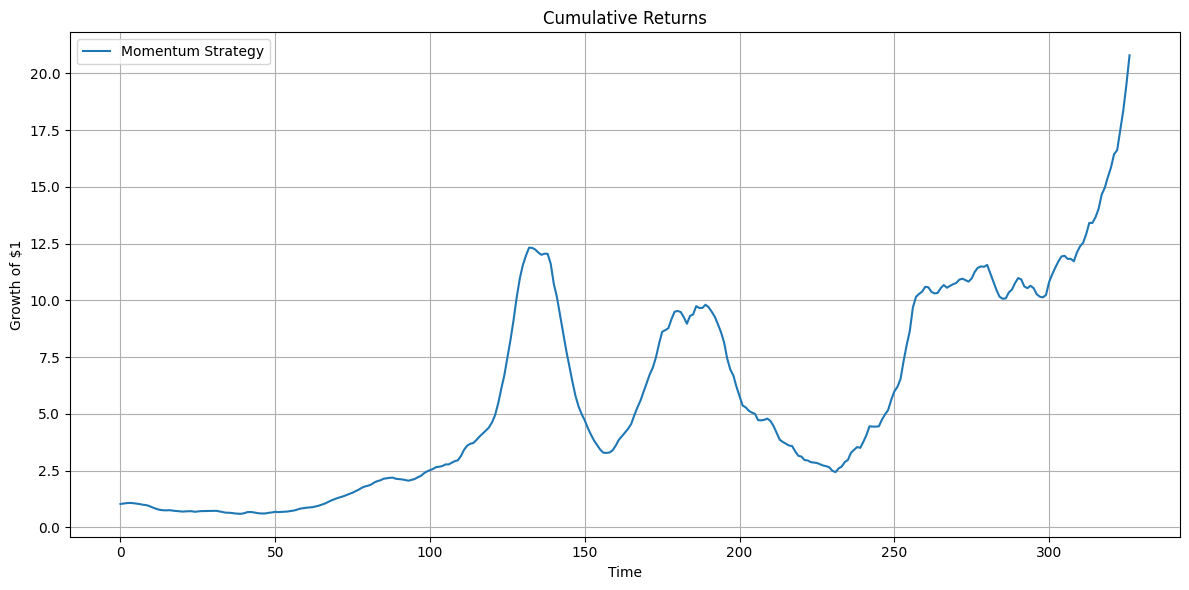

Annualized Return: 12.96%
Standard Deviation: 4.23%
Sharpe Ratio: 3.07


In [10]:
# Step 3: Download adjusted close prices for the last 370 days
data = yf.download(selected_tickers, period="370d", interval="1d", auto_adjust=True)
data = data['Close']
# Step 4: Calculate momentum (21-day return)
momentum = data.pct_change(periods=21)
# Step 5: Rank stocks by momentum
ranks = momentum.rank(axis=1, ascending=False)
# Step 6: Momentum Strategy Logic
monthly_returns = []
dates = data.copy()

for i in range(22, len(dates)-21):
    end_trade_date = dates.iloc[i+21].name
    start_trade_date = dates.iloc[i].name
    available_momentum = momentum.iloc[i-1]
    top_10 = available_momentum.nlargest(10).index
    buy_prices = data.loc[start_trade_date, top_10]
    sell_prices = data.loc[end_trade_date, top_10]
    returns = (sell_prices / buy_prices) - 1
    monthly_return = returns.mean()
    monthly_returns.append(monthly_return)

# Step 7: Create return DataFrame
returns_df = pd.DataFrame(monthly_returns, columns=['Strategy'])

# Step 8: Performance Metrics
cumulative_strategy = (1 + returns_df['Strategy']).cumprod()
annualized_return = ((1 + returns_df['Strategy'].mean()) ** 12) - 1
std_dev = np.std(returns_df['Strategy'])
sharpe_ratio = annualized_return / std_dev

# Step 9: Plot results
plt.figure(figsize=(12, 6))
plt.plot(cumulative_strategy, label='Momentum Strategy')
plt.title("Cumulative Returns")
plt.xlabel("Time")
plt.ylabel("Growth of $1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Print metrics
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Standard Deviation: {std_dev:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")